What we have done already.

![Sunny Savita - Realtime Multimodal RAG Usecase with Google Gemini-Pro-Vision and Langchain RAG Application #rag [1a94Pfn6sIg - 782x440 - 3m35s].png](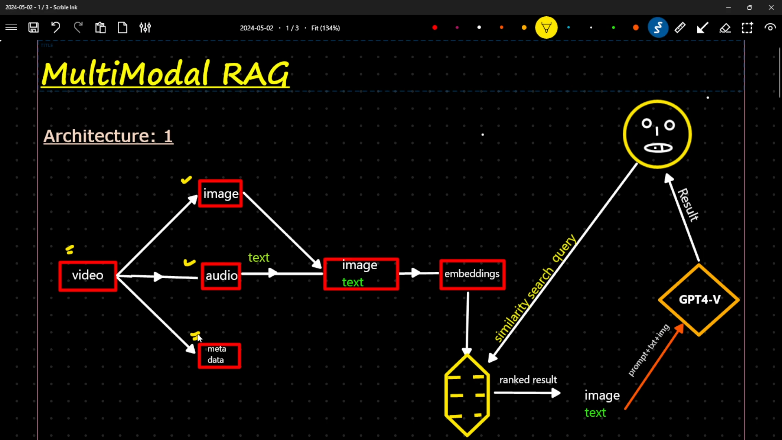)

![Sunny Savita - Realtime Multimodal RAG Usecase with Google Gemini-Pro-Vision and Langchain RAG Application #rag [1a94Pfn6sIg - 782x440 - 4m01s].png](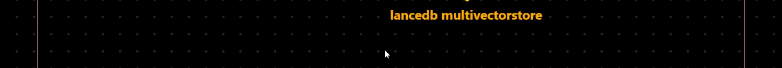)

![Sunny Savita - Realtime Multimodal RAG Usecase with Google Gemini-Pro-Vision and Langchain RAG Application #rag [1a94Pfn6sIg - 782x440 - 8m56s].png](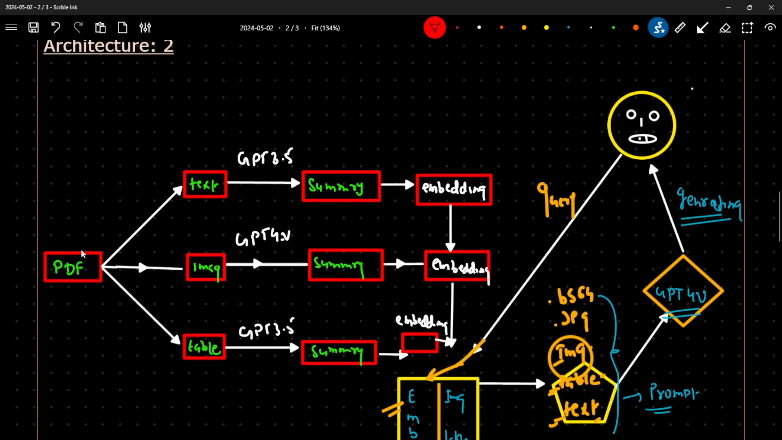)

![Sunny Savita - Realtime Multimodal RAG Usecase with Google Gemini-Pro-Vision and Langchain RAG Application #rag [1a94Pfn6sIg - 782x440 - 9m19s].png](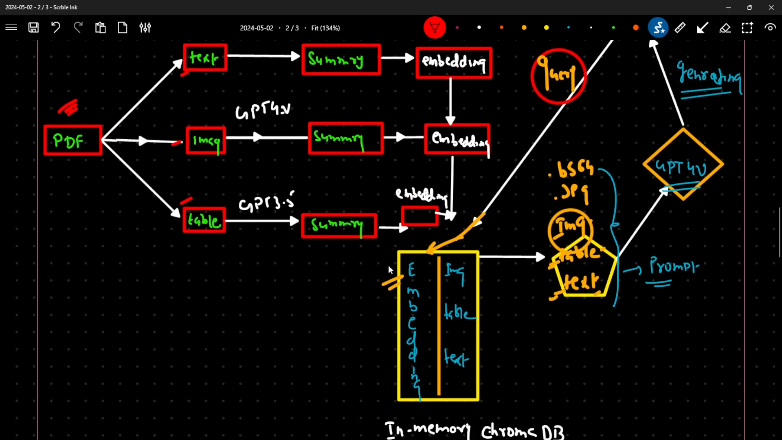)

Archetecture - 3

![Sunny Savita - Realtime Multimodal RAG Usecase with Google Gemini-Pro-Vision and Langchain RAG Application #rag [1a94Pfn6sIg - 782x440 - 12m55s].png](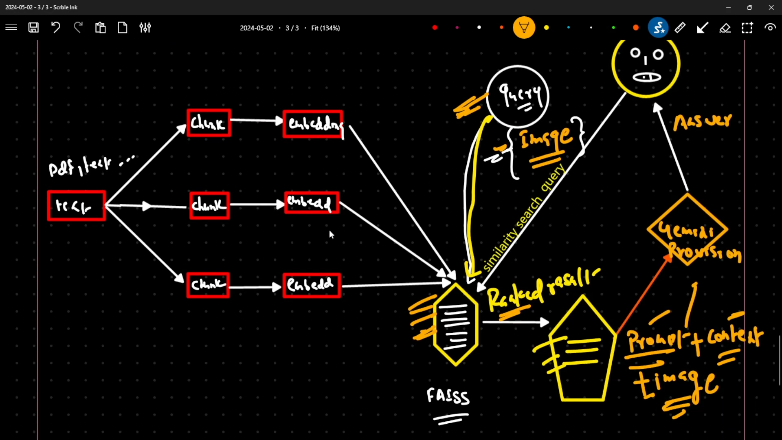)

This we are going to implement today. Based on the image of student, I want to fetch the information about the student. = example

In [ ]:
%pip install --upgrade  langchain langchain-google-genai "langchain[docarray]" faiss-cpu pypdf

In [ ]:
import os
import requests
from PIL import Image

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:

from langchain_core.messages import HumanMessage, SystemMessage

In [ ]:
!pip install langchain-community

In [ ]:

from langchain.vectorstores import DocArrayInMemorySearch

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader

In [ ]:
from langchain_text_splitters import CharacterTextSplitter

In [ ]:

from langchain_community.vectorstores import FAISS

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [ ]:
def load_model(model_name):
  llm = ChatGoogleGenerativeAI(model = model_name)
  return llm


In [ ]:
model_text = load_model("gemini-pro")

In [ ]:
model_text

ChatGoogleGenerativeAI(model='models/gemini-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7846660793c0>, default_metadata=())

In [ ]:
model_text.invoke("please come up with the best funny line.").content

'"I\'m so good at sleeping, I can do it with my eyes closed!"'

In [ ]:
model_text.invoke(
    [
        HumanMessage(content="Answer with Simple 'Yes' or 'No'. Question: Is apple a Fruit?")
    ]
).content

'Yes'

In [ ]:
def get_image(url,filename,extension):
  content = requests.get(url).content
  with open(f'/content/{filename}.{extension}', 'wb') as f:
    f.write(content)
  image = Image.open(f"/content/{filename}.{extension}")
  image.show()
  return image


In [ ]:
image = get_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png",
                  "nike-shoes",
                  "png")

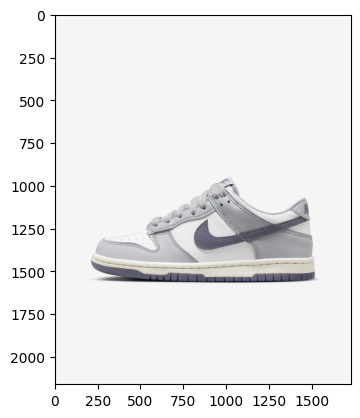

In [ ]:
plt.imshow(image)
plt.show()

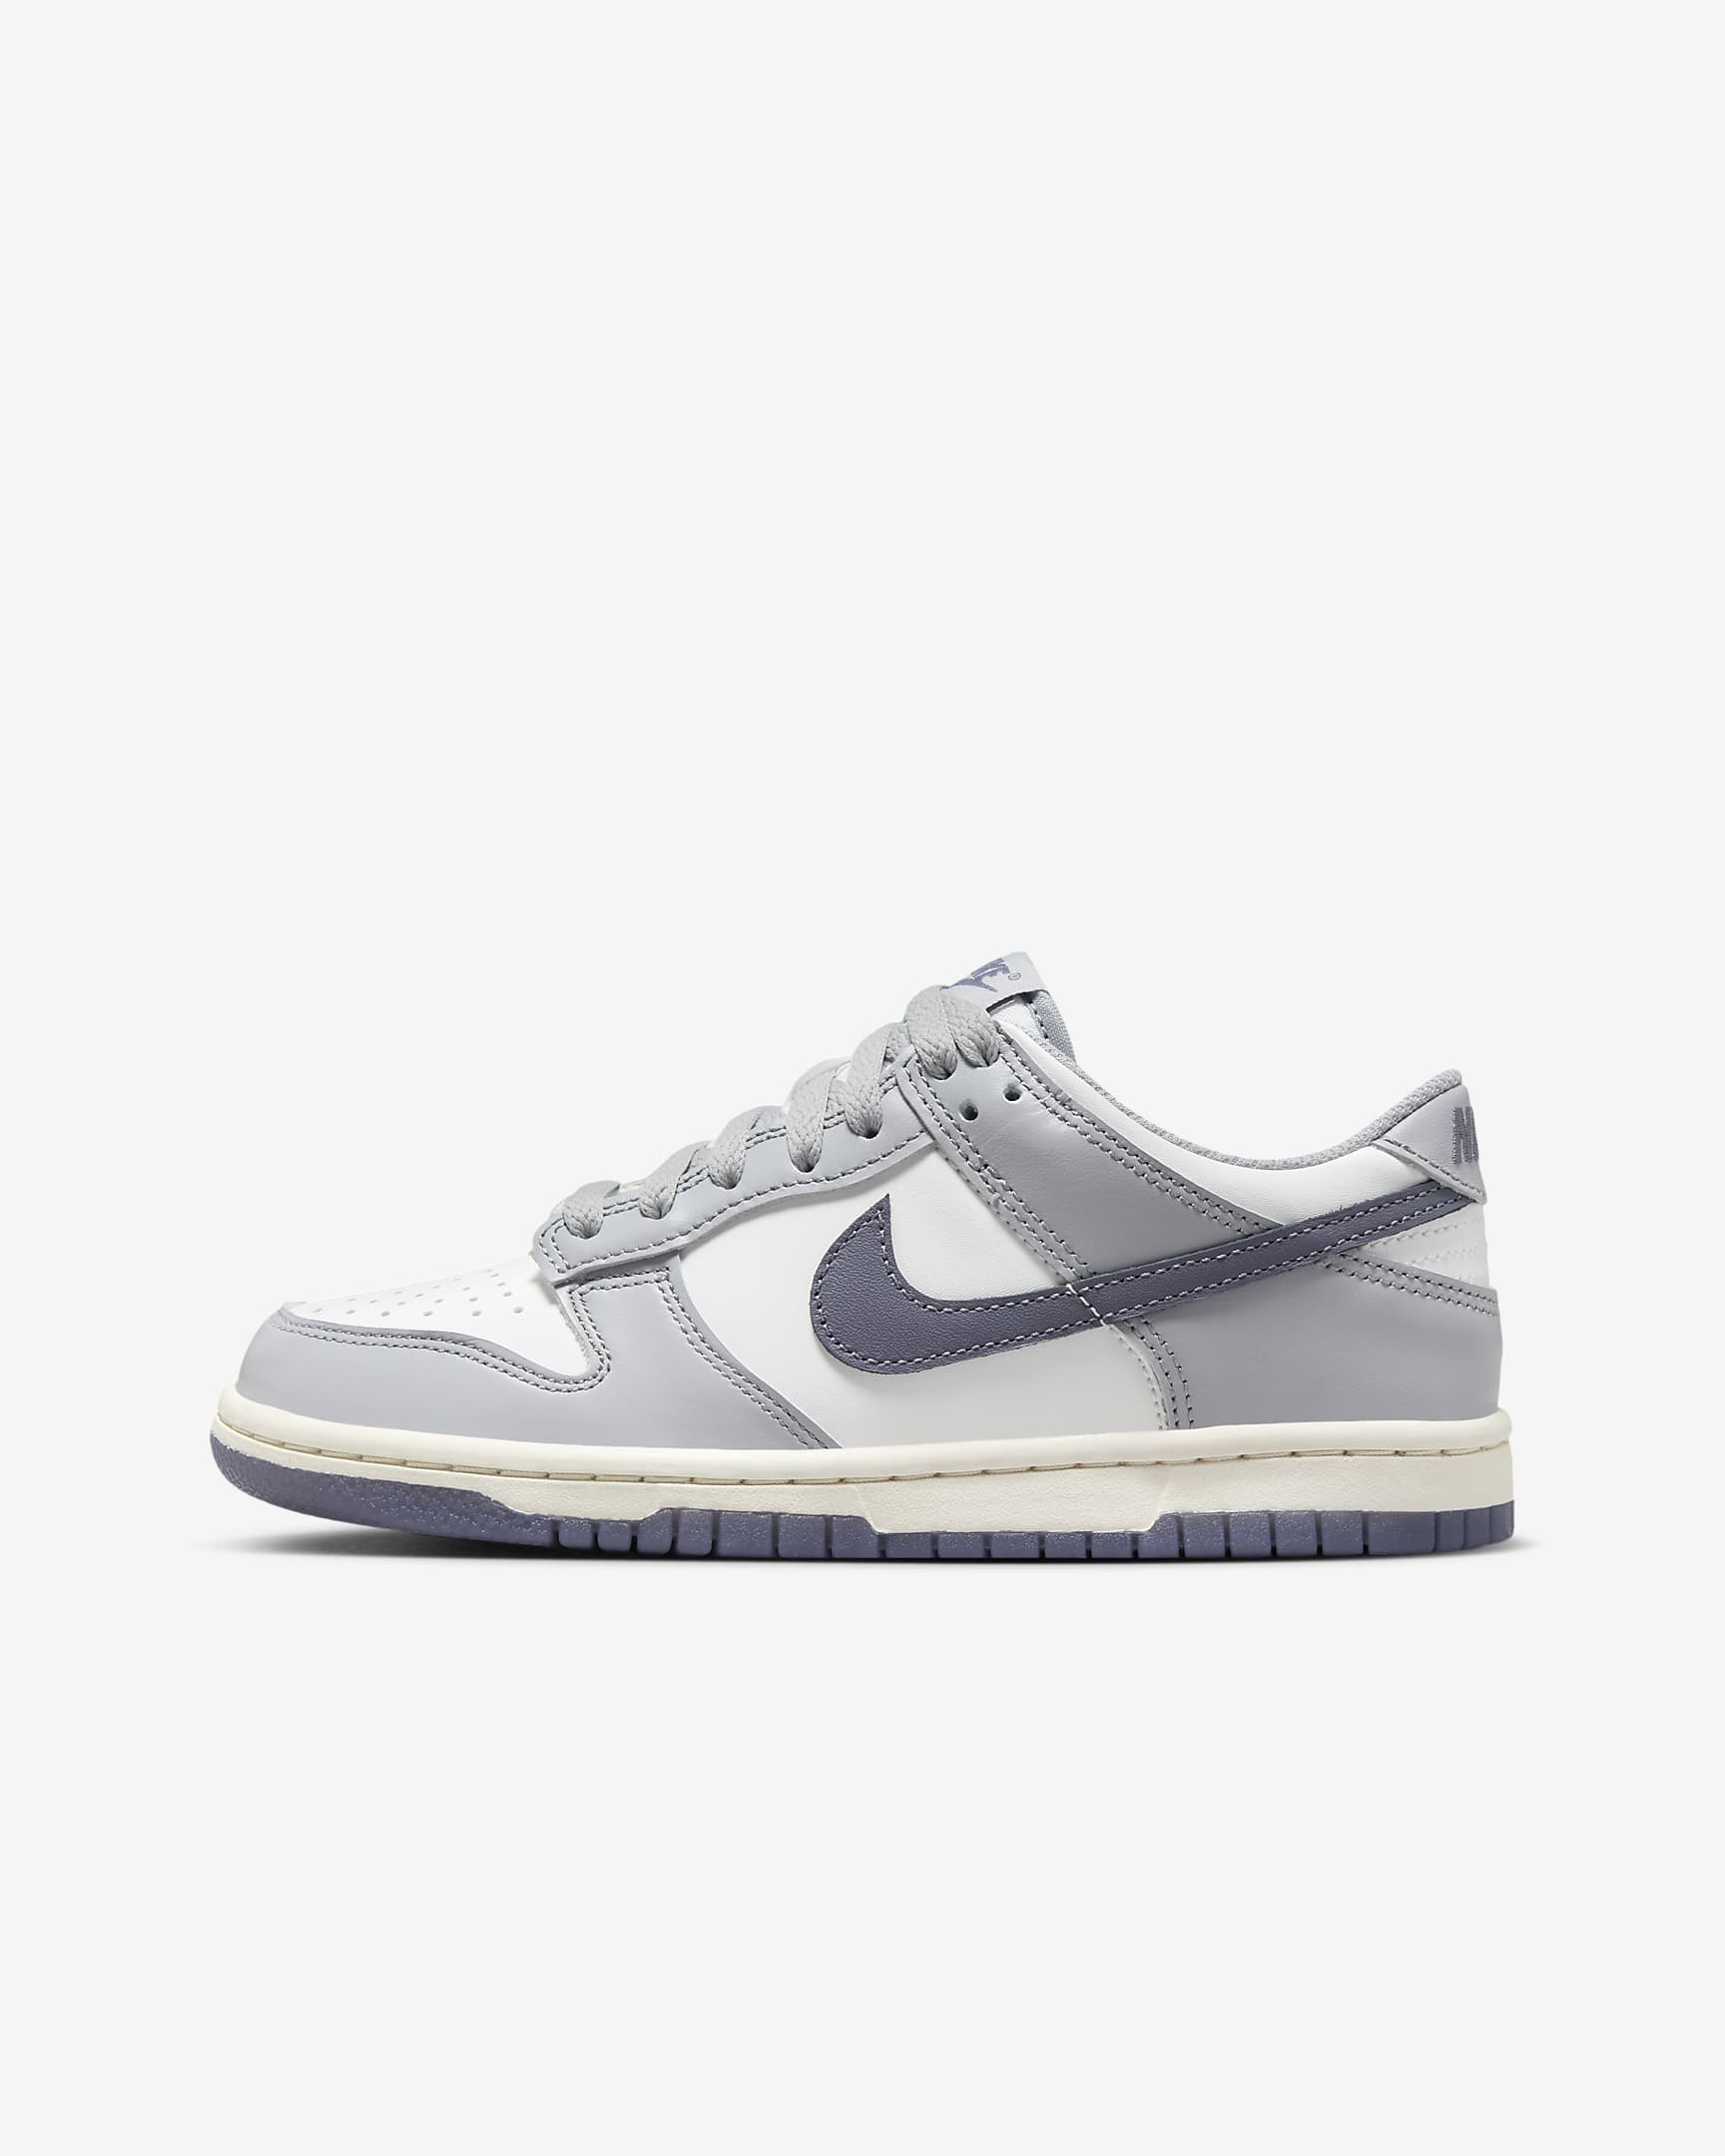

In [ ]:
image

In [ ]:
vision_model = load_model("gemini-pro-vision")

In [ ]:
prompt="give me summary of this image in 5 words"

In [ ]:
image = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png"

In [ ]:

# Initialize the vision model
vision_model = load_model("gemini-2.0-flash-exp")

# Prepare the input

# Define the message sequence
messages = [
     HumanMessage(
       content=[
         {
            "type": "text",
            "text": prompt,
        },
        {

            "type": "image_url",
            "image_url": image
        }
    ]
  )
]

# Invoke the model
res = vision_model.invoke(messages) # here directly () me pass kr diya input2, since [] ko upar hi laga diya tha

# Print the result
print(res)

content='Gray and white Nike shoe' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-0ea54280-b6f7-447b-a71e-0f3fcdc70727-0' usage_metadata={'input_tokens': 269, 'output_tokens': 5, 'total_tokens': 274, 'input_token_details': {'cache_read': 0}}


In [ ]:
vision_model.invoke(prompt)

AIMessage(content="Okay, I'm ready! Please provide me with the image. Once you do, I'll give you a 5-word summary.\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-7a3d6f1b-d191-4d93-906a-2f0666c8491b-0', usage_metadata={'input_tokens': 11, 'output_tokens': 31, 'total_tokens': 42, 'input_token_details': {'cache_read': 0}})

In [ ]:
from langchain_core.messages import HumanMessage

prompt = "give me summary of this image in 5 words"

image =  "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png"

# Define the message sequence
messages =  HumanMessage(
       content=[
         {
            "type": "text",
            "text": prompt,
        },
        {

            "type": "image_url",
            "image_url": image
        }
    ]
)


# Assuming `vision_model` is your model that accepts the messages
response = vision_model.invoke([messages]) # see here ([]) ke andar message hai.

# Print the response content
print(response.content)


Gray and white Nike shoe.


In [ ]:
loader = TextLoader("/content/nike_shoe_description.txt")
print(loader.load()[0].page_content)

Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.
Here are some more details about the Nike Air Max Plus:
Style: TN
Release date: January 1, 2017
Style code: 852630-300
Original retail price: $150 USD
The Air Max Plus, also known as the TN, is a popular Nike running shoe that was first released in 1998. It is known for its unique design, which includes a gradient upper, visible Air Max units, and a wavy outsole. The TN has been a popular shoe among sneakerheads and casual wearers alike for over two decades.
It features a brown upper with a black Swoosh logo and a white sole. The shoe is currently available for resale on the StockX marketplace for an average price of around $150 USD.
Nike Air Max Plus Store Location: "Kings Way, Kathmandu, Nepal".
\n\n\n



Nike Dunk Low Retro sneakers.
Here are some more details about the Nike Dunk Low Retro:
Style: Low-top
Release date: October 31

Augmenting the response of the image, as per my inout txt file

In [ ]:
text=loader.load()[0].page_content

In [ ]:
def get_text_chunks_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs

In [ ]:
docs = get_text_chunks_langchain(text)

In [ ]:
docs

[Document(metadata={}, page_content='Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.\nHere are some more details about the Nike Air Max Plus:\nStyle: TN\nRelease date: January 1, 2017\nStyle code: 852630-300\nOriginal retail price: $150 USD\nThe Air Max Plus, also known as the TN, is a popular Nike running shoe that was first released in 1998. It is known for its unique design, which includes a gradient upper, visible Air Max units, and a wavy outsole. The TN has been a popular shoe among sneakerheads and casual wearers alike for over two decades.\nIt features a brown upper with a black Swoosh logo and a white sole. The shoe is currently available for resale on the StockX marketplace for an average price of around $150 USD.\nNike Air Max Plus Store Location: "Kings Way, Kathmandu, Nepal".\n\\n\\n\\n'),
 Document(metadata={}, page_content='Nike Dunk Low Retro sneakers.\nHere are s

In [ ]:
len(docs)

3

In [ ]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [ ]:
vectorstore = FAISS.from_documents(docs,embedding=embeddings)

In [ ]:

retriever=vectorstore.as_retriever()


In [ ]:
retriever.invoke("Nike slide/sandal.")

[Document(id='ded7f54f-5e4c-4dbf-a025-f597fb24beef', metadata={}, page_content='Nike slide/sandal.\nThey appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.\nHere are some of the features:\nSoft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.\nPhylon midsole: The midsole is made of Phylon, which provides cushioning and support.\nRubber outsole: The outsole is made of rubber for traction and durability.\nSwoosh logo: The Nike Swoosh logo is on the strap of the sandal.\nAvailable in a variety of colors: The Nike Benassi Solarsoft Sandal is available in a variety of colors, including black, white, and beige.\nNike off courte slides store location: "Bhaktapur, Nepal".'),
 Document(id='a9a52e4b-a7ff-4e6d-a6a7-27c4be140a5a', metadata={}, page_content='Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.\nHere are some more

In [ ]:
llm_text_vision = load_model("gemini-2.0-flash-exp")  # "gemini-2.0-flash-exp" support both text and vision

In [ ]:
url_1 = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/252f2db6-d426-4931-80a0-8b7f8f875536/calm-slides-K7mr3W.png"


message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Provide information on given sandle image Brand and model.",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": url_1},
    ]
)

In [ ]:
# llm(gemini-flash-2.0-exp) is itself capable of taking images and text simultaneously. So no need of any ragchain

result = llm_text_vision.invoke([message]) # no rag chain. but ye response me llm apne knowledge ko use kr rha hai generation me


In [ ]:
result.content

'Certainly!\n\nBased on the images provided, the sandals are:\n\n**Brand:** Nike\n\n**Model:** Nike Calm Slides'

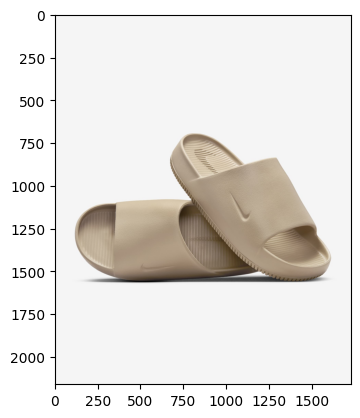

In [ ]:

image = get_image(url_1, "nike3", "png")


plt.imshow(image)
plt.show()

In [ ]:

from langchain_core.runnables import RunnableLambda, RunnablePassthrough

In [ ]:

template = """
```
{context}
```

{query}


Provide information from provided context. If the context is not available just say I don't know
"""


In [ ]:
prompt = ChatPromptTemplate.from_template(template)

In [ ]:

rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | llm_text_vision  # able to handle text and image simulataneously
    | StrOutputParser()
)


In [ ]:
result = rag_chain.invoke("can you give me a detail of nike sandal?")

In [ ]:
display(Markdown(result))

The Nike slide/sandal is a unisex slide/sandal with the following features:

*   **Upper:** Soft, one-piece synthetic material for comfort and support.
*   **Midsole:** Phylon midsole for cushioning and support.
*   **Outsole:** Rubber outsole for traction and durability.
*   **Logo:** Nike Swoosh logo on the strap.
*   **Colors:** Available in various colors, including black, white, and beige.

The store location for the Nike off courte slides is Bhaktapur, Nepal.


In [ ]:
rag_chain

{
  context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x784666988040>, search_kwargs={}),
  query: RunnablePassthrough()
}
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template="\n```\n{context}\n```\n\n{query}\n\n\nProvide information from provided context. If the context is not available just say I don't know\n"), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-2.0-flash-exp', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7846669b34f0>, default_metadata=())
| StrOutputParser()

In [ ]:
rag_chain.invoke("give me bram name of this sandle present at this url : {url_1}")

'I don\'t have access to external URLs, so I am unable to fulfill your request. However, based on the context provided, the Nike slide/sandal is the "Nike Slide/Sandal", also known as the "Nike Benassi Solarsoft Sandal".\n'

ese url nhi le rha hai

In [ ]:
# Pass the variable dynamically into the string : ese url bhi le rha
query = f"Give me the brand name of the sandal present at this URL: {url_1}. Is the image a sandle or shoe"

# Invoke the chain
result = rag_chain.invoke(query)

# Print the result
print(result)

Based on the provided context, the brand name of the sandal is **Nike**. The context also states that the item is a **slide/sandal**.



In [ ]:

url_2 = "https://media.gettyimages.com/id/172417586/photo/elegant-black-leather-shoes.jpg?s=612x612&w=gi&k=20&c=_HiU2PSG-krAT5-QIlDskHEhmXOTYQzSushSW51F25c="


# Pass the variable dynamically into the string
query = f"Give me the brand name of the sandal present at this URL: {url_2}. Is the image a sandle or shoe"

# Invoke the chain
result = rag_chain.invoke(query)

# Print the result
print(result)

Based on the provided context, I cannot determine the brand of the sandal in the image you linked. The context describes Nike sandals, sneakers, and shoes but does not mention anything about the image you shared. Additionally, the image link shows elegant black leather shoes, not sandals.



Wow keval ek chain se I am able to give image as well as text. This is advantage of gemini-flash-2.0.exp, which is a multimodal transformer/llm. Jo image and text sath sath process kr leta hai.

The image at url 2 was a shoe. Jiske bare me document jo hmne RAG me diya hai usme koi info nhi hai. So llm ne simply bol diya ye show hai and iske bare me document me koi info nhi hai. So simple rag_chain just with single llm hm dono kam kr le rhe hain.

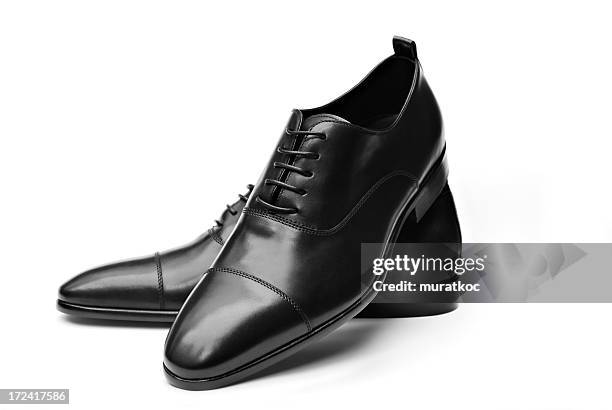

In [ ]:
from PIL import Image
import requests
from io import BytesIO

# Fetch the image from the URL
response = requests.get(url_2)
image = Image.open(BytesIO(response.content))

# Display the image
display(image)

In [ ]:
# let's ask pure llm about the thing written on the image.

query = f"What is the image in {url_2}. Tell me about the its color in 2 sentences"

response_1 = llm_text_vision.invoke(query)

print(response_1.content)

The image shows a pair of men's black leather dress shoes. The shoes are a deep, rich black color, giving them a formal and classic appearance.



In [ ]:
# let's ask this same now to the RAG, which is supposed to give imformation from the document only

query = f"What is the image in {url_2}. Tell me about the its color in 2 sentences"

response_1 = rag_chain.invoke(query)

print(response_1)

I don't know. The provided context describes Nike products, not the image you linked.



Dekha jadu. RAG_CHAIN ko same query dene pr image in document milne pr hi ans dega. Yhan tk ki image ka color bhi nahi bata rha hai since image document me nhi thi.

# let's suppose text ke liye alag and vision ke liye alag alag modals use krne hote to rag pipeline kaisi dikhti

In [ ]:
retriever

VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x784666988040>, search_kwargs={})

In [ ]:
# Access the FAISS vector store from the retriever
vector_store = retriever.vectorstore

# Check the type of vector store
print(type(vector_store))

# Access the stored documents or metadata
if hasattr(vector_store, "docs"):
    print(vector_store.docs)  # List of documents stored
elif hasattr(vector_store, "store"):
    print(vector_store.store)  # Internal FAISS store

# Search for specific documents (if supported)
results = vector_store.similarity_search("what is the infomation you have", k=5)  # Adjust 'k' for the number of results
for result in results:
    print(result)

<class 'langchain_community.vectorstores.faiss.FAISS'>
page_content='Nike slide/sandal.
They appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.
Here are some of the features:
Soft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.
Phylon midsole: The midsole is made of Phylon, which provides cushioning and support.
Rubber outsole: The outsole is made of rubber for traction and durability.
Swoosh logo: The Nike Swoosh logo is on the strap of the sandal.
Available in a variety of colors: The Nike Benassi Solarsoft Sandal is available in a variety of colors, including black, white, and beige.
Nike off courte slides store location: "Bhaktapur, Nepal".'
page_content='Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.
Here are some more details about the Nike Air Max Plus:
Style: TN
Release date: January 1, 2017
Style code

In [ ]:
llm_text = load_model("gemini-1.5-pro")

llm_vision = load_model("gemini-2.0-flash-exp")

# load model is a function defined abouve to give models of google gemini

template = """
```
{context}
```

{query}


Provide information from provided context. If the context is not available just say I don't know
"""

prompt = ChatPromptTemplate.from_template(template)

# creating rag chain for multi model support

rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)


full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

In [ ]:
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Provide information on given image Brand and model.",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": url_1},  # url_1 is sandle, but url_2 is shoe
    ]
)

In [ ]:
result = full_chain.invoke([message])

In [ ]:
display(Markdown(result))

Based on the provided context, here's the information about the Nike slides/sandals:

**Brand:** Nike

**Model:** Nike Slide/Sandal (specifically mentioned as the Nike Benassi Solarsoft Sandal in the text)

**Features:**

*   Soft, one-piece synthetic upper
*   Phylon midsole for cushioning and support
*   Rubber outsole for traction and durability
*   Swoosh logo on the strap
*   Available in various colors, including black, white, and beige.

**Store Location:** Bhaktapur, Nepal


Sandle ko to isne sandle hi recognize kiya, as a shoe or sneakers recognize nhi kiya.

In [ ]:
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Provide information on given image Brand and model.",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": url_2},  # url_1 is sandle, but url_2 is shoe
    ]
)

result = full_chain.invoke([message])

display(Markdown(result))

Okay, I understand. Based on the provided context, here's the information about the shoes:

**1. Nike Slide/Sandal**

*   **Type:** Unisex slide/sandal
*   **Features:**
    *   Soft, one-piece synthetic upper
    *   Phylon midsole for cushioning
    *   Rubber outsole for traction
    *   Nike Swoosh logo on the strap
    *   Available in various colors (e.g., black, white, beige)
*   **Store Location:** Bhaktapur, Nepal

**2. Nike Air Max Plus sneakers**

*   **Type:** Running shoe (also known as TN)
*   **Features:**
    *   Brown upper
    *   Black Nike Swoosh logo on the side
    *   Visible Air Max unit in the heel
    *   White sole
    *   Gradient upper
    *   Wavy outsole
*   **Release Date:** January 1, 2017
*   **Style Code:** 852630-300
*   **Original Retail Price:** $150 USD
*   **Current Resale Price (StockX):** Around $150 USD
*   **Store Location:** Kings Way, Kathmandu, Nepal

**3. Nike Dunk Low Retro sneakers**

*   **Type:** Low-top skateboarding shoe
*   **Features:** Classic silhouette, available in various colors and materials
*   **Release Date:** October 31, 2020
*   **Style Code:** DD1391-100
*   **Original Retail Price:** $100 USD
*  **Current Resale Price (StockX):** Around $200 USD
*   **Store Location:** Patan, Lalitpur, Nepal

**Summary of Shoe Types and Locations:**

*   **Nike Slide/Sandal:** Bhaktapur, Nepal
*   **Nike Air Max Plus:** Kings Way, Kathmandu, Nepal
*   **Nike Dunk Low Retro:** Patan, Lalitpur, Nepal


Jute ko isne juta , sandle sb man ke nike prodect ke rup me describe kr diya

## So we are done with this interesting RAG, jisme hm image and text sath sath de skte hain, and provided document ke basis pr answer prapt kr skte hain.

# gemini ka llm abhi pdf lena support nhi krta vo chap gpt ki openai jaisa multimodal system jo text, image and table sb ko process kr le document se and kisi pr bhi based answer de de esa hm nhi bana skte hain gemini ki llm se. May be llama 3.3 se ho skte, will try soom

**But bhai jo maine seekha hai na : llm.invoke() and rag_chain.invoke() is very awasome. Kya difference hai dono me. Direct llm.invoke() chala dene se llm apni knowledgebase ka use krke answer deta hai. Hm apna koi document / text ko keval query string ke andar h de skte hain if we want our llm to use that.**

**But rag_chain.invoke() me response of the query keval document pe based hota hai jo hm "retriver" ke rup me pass krte hain during rag_chain formation.**

**Also we learnt how to create complex chain in langchain, providing multiple llm in the chain.**

In [ ]:
llm = load_model("gemini-1.5-pro")
print(llm)

query = f"What is the image in {url_2}. Tell me about the its color in 2 sentences"

response_1 = llm.invoke(query)

print(response_1.content)

model='models/gemini-1.5-pro' google_api_key=SecretStr('**********') client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x784650121570> default_metadata=()
The image shows a pair of elegant men's dress shoes, likely made of black leather, with a cap-toe design.  The shoes are predominantly black, with subtle variations in tone due to the polished finish and the way the light reflects off the leather.



So url pr jakar image rad krne ki power gemini-1.5-pro ke pas bhi hai, mujhe lga tha gemini-2.0-flash hi keval kr skta hai

In [ ]:
llm = load_model("gemini-pro")


query = f"What is the image in {url_1}. Tell me about the its color in 2 sentences"

response_1 = llm.invoke(query)

print(response_1.content)

The image is of a pair of slides. The slides are a light blue color, with a white Nike swoosh on the side. The slides have a soft, plush lining, and a comfortable, supportive sole.


So both gemini-pro and gemini-1.5-pro are capable to go to links provided and view and analyse the images

Oh my got gemini-1.5-pro is able to read iamge as well from website

In [ ]:
import base64

# Load the model
llm = load_model("gemini-1.5-pro")

# Specify the image file path
image_path = "/content/random.jpg"


# Encode the image to base64
with open(image_path, "rb") as f:
    image_base64 = base64.b64encode(f.read()).decode("utf-8")

# Prepare a compliant message with `role` and `content`
query = [
    {
        "role": "user",
        "content": "Tell me about its colors in 2 sentences. what is it about"
    },
    {
        "role": "user",
        "content": f"Here is the image in base64 format: {image_base64}"
    }
]

# Pass the query to the model
response_1 = llm.invoke(query)

# Print the result
print(response_1)

content='The image shows a vibrant array of colors, including various shades of red, orange, yellow, green, blue, and purple. These colors are arranged in a swirling, abstract pattern, resembling a tie-dye or marble effect.\n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-9271cc4c-a4e8-4382-abbe-fc9dbee499eb-0' usage_metadata={'input_tokens': 42010, 'output_tokens': 47, 'total_tokens': 42057, 'input_token_details': {'cache_read': 0}}


In [ ]:
import base64

# Load the model
llm = load_model("gemini-pro")

# Specify the image file path
image_path = "/content/random.jpg"

# Encode the image to base64
with open(image_path, "rb") as f:
    image_base64 = base64.b64encode(f.read()).decode("utf-8")

# Prepare a compliant message with `role` and `content`
query = [
    {
        "role": "user",
        "content": "Tell me about about the image"
    },
    {
        "role": "user",
        "content": f"Here is the image in base64 format: {image_base64}"
    }
]

# Pass the query to the model
response_2 = llm.invoke(query)

# Print the result
print(response_2.content)

ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 Input request contains (42013) tokens, which is more than the max tokens limit allowed: (30720)

In [ ]:
from PIL import Image
import base64

# Load the model
llm = load_model("gemini-pro")

# Specify the image file path
image_path = "/content/random.jpg"

# Compress the image
compressed_image_path = "/content/compressed_random.jpg"
image = Image.open(image_path)
image.save(compressed_image_path, format="JPEG", optimize=True, quality=35)

# Encode the compressed image to base64
with open(compressed_image_path, "rb") as f:
    image_base64 = base64.b64encode(f.read()).decode("utf-8")

# Prepare the query
query = [
    {
        "role": "user",
        "content": "Tell me about the image"
    },
    {
        "role": "user",
        "content": f"Here is the compressed image in base64 format: {image_base64}"
    }
]

# Pass the query to the model
response_2 = llm.invoke(query)

# Print the result
print(response_2.content)


The image is compressed, so I can't see the details very well. However, it appears to be a photograph of a person wearing a white shirt and a black tie. The person is standing in front of a brown background.


So encode krke dono gemini 1.5 and 1.5 pro images ko analyse kr lete hai chahe vo local storage me hi kyon na hon

In [ ]:
import base64

# Load the model
llm = load_model("gemini-2.0-flash-exp")

# Specify the image file path
image_path = "/content/random.jpg"

# Encode the image to base64
with open(image_path, "rb") as f:
    image_base64 = base64.b64encode(f.read()).decode("utf-8")

# Prepare a compliant message with `role` and `content`
query = [
    {
        "role": "user",
        "content": "Tell me about about the image"
    },
    {
        "role": "user",
        "content": f"Here is the image in base64 format: {image_base64}"
    }
]

# Pass the query to the model
response_2 = llm.invoke(query)

# Print the result
print(response_2.content)

Certainly! Here's a description of the image you sent:

**Overall Impression**

The image appears to be a black and white text-based document, likely a page from a book or a script. It's filled with dense text in what seems to be a serif font, and the overall impression is that of a typed or printed page.

**Key Elements**

*   **Text:** The image is dominated by text. It's continuous and formatted in a way that suggests paragraphs or blocks of writing. 
*   **Font:** The font appears to be a serif typeface, giving it a traditional and formal feel.
*   **Layout:** The text is organized in a linear fashion, with left justification. There aren't any apparent visual breaks like headings, subheadings, or illustrations.
*   **Black and White:** The image is solely in black and white, which suggests a printed or scanned document, rather than a color photograph.
*   **Character Set:** Based on the common characters and spacing, it appears to be in a language using the Latin alphabet.
*   **De

In [ ]:
llm_vision = load_model("gemini-pro") # only text supported in RAG

llm_text = load_model("gemini-1.5-pro") # supports both TEXT + IMAGE in RAG

# load model is a function defined abouve to give models of google gemini

template = """
```
{context}
```

{query}


"""

prompt = ChatPromptTemplate.from_template(template)

# creating rag chain for multi model support

rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)


full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Can you tell me what is their in the image",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": url_2},  # url_1 is sandle, but url_2 is shoe
    ]
)

result = full_chain.invoke([message])

display(Markdown(result))

ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 Image input modality is not enabled for models/gemini-pro

Abhi jadu dekh : vision me gemini-pro set kiya , toh bol rha image modality not available in gemini pro. means bat clear hai both the llms are being used, see below how actually.

In [ ]:
llm_text = load_model("gemini-pro")

llm_vision = load_model("gemini-1.5-pro")

# load model is a function defined abouve to give models of google gemini

template = """
```
{context}
```

{query}


"""

prompt = ChatPromptTemplate.from_template(template)

# creating rag chain for multi model support

rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)


full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Can you tell me what is their in the image",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": url_2},  # url_1 is sandle, but url_2 is shoe
    ]
)

result = full_chain.invoke([message])

display(Markdown(result))

The provided text does not contain any information about the image, so I cannot answer this question from the provided context.

see gemini_1.5_pro ke pas image modality available hai, hence it is showing the error of the modality not available wala. Ab ye docs se data retreive krne ki try kr rha through "gemini-pro", gemini-pro-1.5 is used in image analysys

In [ ]:
llm_text = load_model("gemini-2.0-flash-exp")

llm_vision = load_model("gemini-1.5-pro")

# load model is a function defined abouve to give models of google gemini

template = """
```
{context}
```

{query}


"""

prompt = ChatPromptTemplate.from_template(template)

# creating rag chain for multi model support

rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)


full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Can you tell me what is their in the image",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": url_2},  # url_1 is sandle, but url_2 is shoe
    ]
)

result = full_chain.invoke([message])

display(Markdown(result))

Your description doesn't match the provided documents.  The documents describe:

* **Nike Slide/Sandal:** Located in Bhaktapur, Nepal.
* **Nike Air Max Plus Sneakers:** Brown with black swoosh, located in Kings Way, Kathmandu, Nepal.
* **Nike Dunk Low Retro Sneakers:** Located in Patan, Lalitpur, Nepal.

There is no mention of black leather dress shoes. You'll need to provide the correct document or image for me to give you a relevant description.


see now text model ko advanced wala diya, it is now able to work too good. It is successfully retreiving the content from the docs. and response style change drastically.

## let's see how the llm_chain is able to use which model for which task?



In [ ]:
rag_chain

{
  context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x784666988040>, search_kwargs={}),
  query: RunnablePassthrough()
}
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template='\n```\n{context}\n```\n\n{query}\n\n\n'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x78464edd6860>, default_metadata=())
| StrOutputParser()

In [ ]:
full_chain

RunnablePassthrough()
| ChatGoogleGenerativeAI(model='models/gemini-2.0-flash-exp', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x78464edb5450>, default_metadata=())
| StrOutputParser()
| {
    context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x784666988040>, search_kwargs={}),
    query: RunnablePassthrough()
  }
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template='\n```\n{context}\n```\n\n{query}\n\n\n'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.cl

In [ ]:
rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Can you tell me what is their in the image",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": url_2},  # url_1 is sandle, but url_2 is shoe
    ]
)

print(message.content)
print("****")
print(message)
print("****")
print([message])

[{'type': 'text', 'text': 'Can you tell me what is their in the image'}, {'type': 'image_url', 'image_url': 'https://media.gettyimages.com/id/172417586/photo/elegant-black-leather-shoes.jpg?s=612x612&w=gi&k=20&c=_HiU2PSG-krAT5-QIlDskHEhmXOTYQzSushSW51F25c='}]
****
content=[{'type': 'text', 'text': 'Can you tell me what is their in the image'}, {'type': 'image_url', 'image_url': 'https://media.gettyimages.com/id/172417586/photo/elegant-black-leather-shoes.jpg?s=612x612&w=gi&k=20&c=_HiU2PSG-krAT5-QIlDskHEhmXOTYQzSushSW51F25c='}] additional_kwargs={} response_metadata={}
****
[HumanMessage(content=[{'type': 'text', 'text': 'Can you tell me what is their in the image'}, {'type': 'image_url', 'image_url': 'https://media.gettyimages.com/id/172417586/photo/elegant-black-leather-shoes.jpg?s=612x612&w=gi&k=20&c=_HiU2PSG-krAT5-QIlDskHEhmXOTYQzSushSW51F25c='}], additional_kwargs={}, response_metadata={})]


In [ ]:
result = rag_chain.invoke([message])

TypeError: expected string or bytes-like object

In [ ]:
llm_text = load_model("gemini-2.0-flash-exp")

llm_vision = load_model("gemini-1.5-pro")


message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Can you tell me what is their in the image",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": url_2},  # url_1 is sandle, but url_2 is shoe
    ]
)


# rag_chain = (
#     {"context": retriever, "query": RunnablePassthrough()}
#     | prompt
#     | llm_text
#     | StrOutputParser()
# )


# full_chain = (
#     RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
# )

## How those api's llm_chain, full_chain() are working. let's see them practiacally

# Step 1: Pass through RunnablePassthrough
step_1_result = RunnablePassthrough().invoke(message)
print("Step 1 (RunnablePassthrough) Output:")
print(step_1_result)

# Flatten HumanMessage content into a string : llm.invoke() expects string only not a dictionary
step_1_flattened = "\n".join(
    f"{item['type'].capitalize()}: {item['text'] if item['type'] == 'text' else item['image_url']}"
    for item in step_1_result.content
)

# Pass the flattened string to llm_vision : first llm me direct invoke, since it is not loaded with "context": retriever parameter , so it will use llm capabilities
step_2_result = llm_vision.invoke(step_1_flattened)
print("\nStep 2 (llm_vision) Output:")
print(step_2_result)

# Step 3: Pass through StrOutputParser
step_3_result = StrOutputParser().invoke(step_2_result)
print("\nStep 3 (StrOutputParser) Output:")
print(step_3_result)

# Step 4: Pass through rag_chain : here llm.invoke we cannot do. Here we want to use "context": retriever so that retreive only info form the document
rag_chain_result = (
    {"context": retriever, "query": RunnablePassthrough()} | prompt | llm_text | StrOutputParser()
).invoke(step_3_result)
print("\nStep 4 (rag_chain) Output:")
print(rag_chain_result)

Step 1 (RunnablePassthrough) Output:
content=[{'type': 'text', 'text': 'Can you tell me what is their in the image'}, {'type': 'image_url', 'image_url': 'https://media.gettyimages.com/id/172417586/photo/elegant-black-leather-shoes.jpg?s=612x612&w=gi&k=20&c=_HiU2PSG-krAT5-QIlDskHEhmXOTYQzSushSW51F25c='}] additional_kwargs={} response_metadata={}

Step 2 (llm_vision) Output:
content="The image shows a pair of elegant black leather men's dress shoes. They appear to be oxfords, characterized by the closed lacing system where the eyelet facings are stitched under the vamp.  They are polished to a high shine.\n" additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-aa7e6d1a-c6f1-4cce-8c69-4a539ed7a582-0' usage_metadata={'input_tokens': 101, 'output_tokens': 50, 'total_tokens': 151, 'input_token_details': {'cache_read': 0}}

Step 3 (StrOutputParser) Output:
The image shows a pair of elegant 

See how the first model i.e. llm_vision is getting information from the image and that information is being passed to llm_text. llm_text then try to find out the data in the document it has been provided. So llm_vision has nothing to do eith the data. It just captions the image.

In [ ]:
step_1_flattened

'Text: Can you tell me what is their in the image\nImage_url: https://media.gettyimages.com/id/172417586/photo/elegant-black-leather-shoes.jpg?s=612x612&w=gi&k=20&c=_HiU2PSG-krAT5-QIlDskHEhmXOTYQzSushSW51F25c='